In [ ]:
!pip install xgboost #To install Extreme Gradient Boosting Regressor
!pip install --upgrade scikit-learn
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.1 MB/s eta 0:00:00


In [ ]:
# Import the libraries
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer
#from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
#to access the data file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to open the data file from google drive
df = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/Tesis/ML tesis.xlsx') #to save the data file as df
df.head() #returns the first 5 rows of the data

,Starch (%),PVA (%),Acetylated distarch phosphate (%),Microcellulose (%),Time (min),Temperature (°C),Sonication time (min),Tensile strength (MPa)
0,50,50.0,0.0,0.0,120,95,0,7.11
1,50,50.0,0.0,0.0,120,95,0,6.71
2,50,50.0,0.0,1.0,120,95,0,7.13
3,50,50.0,0.0,2.5,120,95,0,8.21
4,50,50.0,0.0,5.0,120,95,0,8.49


In [ ]:
round(df.describe(),2) # describe() returns the description of the data in the DataFrame (mean, standard deviation, and percentiles)
# A data frame is a data structure that organizes data into a 2-dimensional table of rows and columns
#round(): returns a value with a specific number of decimals

,Starch (%),PVA (%),Acetylated distarch phosphate (%),Microcellulose (%),Time (min),Temperature (°C),Sonication time (min),Tensile strength (MPa)
count,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
mean,14.50,79.56,3.93,4.72,116.08,81.00,11.07,29.06
std,21.97,21.60,11.89,5.30,80.71,18.93,20.61,20.54
min,0.00,50.00,0.00,0.00,30.00,25.00,0.00,3.92
25%,0.00,55.70,0.00,0.88,82.50,80.00,0.00,13.69
50%,0.00,90.00,0.00,3.00,120.00,85.00,0.00,22.67
75%,35.00,100.00,0.00,6.38,120.00,95.00,8.25,37.25
max,50.00,100.00,40.00,20.00,390.00,95.00,60.00,102.03


In [ ]:
round(df.corr( ),2)  #to calculate the correlation coefficient of the variables and round the values to two decimal places

,Starch (%),PVA (%),Acetylated distarch phosphate (%),Microcellulose (%),Time (min),Temperature (°C),Sonication time (min),Tensile strength (MPa)
Starch (%),1.00,-0.83,-0.22,-0.09,-0.05,0.47,-0.36,-0.50
PVA (%),-0.83,1.00,-0.32,0.08,0.13,-0.47,0.28,0.43
Acetylated distarch phosphate (%),-0.22,-0.32,1.00,-0.19,-0.03,-0.02,0.23,-0.03
Microcellulose (%),-0.09,0.08,-0.19,1.00,0.12,-0.12,-0.25,0.33
Time (min),-0.05,0.13,-0.03,0.12,1.00,-0.72,-0.12,-0.25
Temperature (°C),0.47,-0.47,-0.02,-0.12,-0.72,1.00,-0.16,-0.02
Sonication time (min),-0.36,0.28,0.23,-0.25,-0.12,-0.16,1.00,-0.00
Tensile strength (MPa),-0.50,0.43,-0.03,0.33,-0.25,-0.02,-0.00,1.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

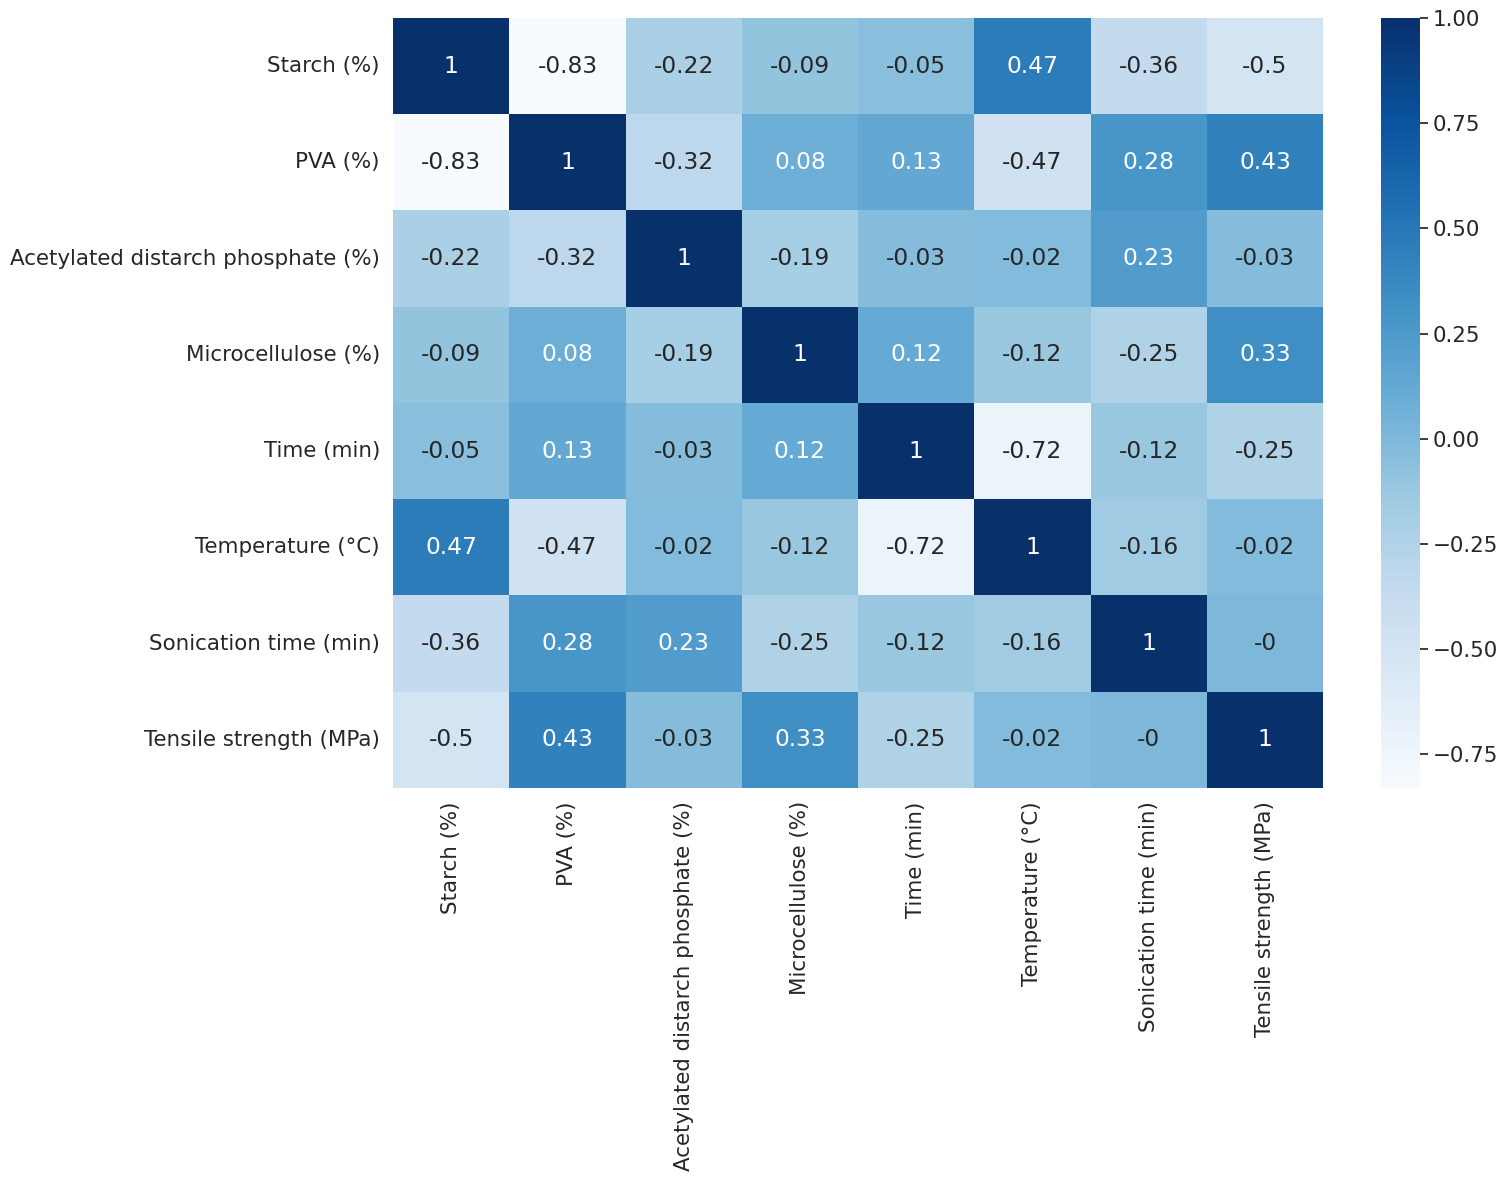

In [ ]:
df_corr = round(df.corr( ),2)#to save the correlation coefficients as df_corr
plt.figure(figsize=(15,10)) #plt.figure() to graph the table
#figsize: width, height in inches of the figure
sns.set(font_scale=1.4) #font size
heat_map = sns.heatmap(df_corr,annot=True,cmap=plt.cm.Blues) #to create the heatmap
#annot=True: to write the data value in each cell'
#cmap=plt.cm.Blues: the color of the heatmap
#to save the image
plt.savefig("heat_map.png", dpi=600, format='png', bbox_inches='tight')
files.download("heat_map.png")

In [ ]:
X = df.drop('Tensile strength (MPa)', axis=1)
y = df['Tensile strength (MPa)']  #Target

Train Metrics:
MSE: 125.7237791580247
RMSE: 11.212661555492732
MAE: 7.824089001735986
MAPE: 0.48920641980947815
R2: 0.7008029437421212

Test Metrics:
MSE: 110.42831802062271
RMSE: 10.508487903624513
MAE: 7.98161024531551
MAPE: 0.5148450262545768
R2: 0.6911154990139223


<ipython-input-17-d8fee21b8110>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')


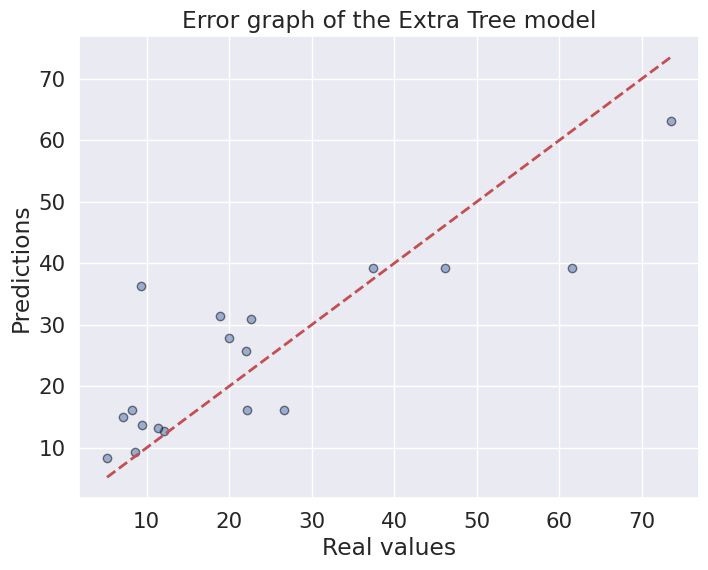

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Implement the ExtraTreesRegressor model
model_et = ExtraTreesRegressor(n_estimators=10, max_depth= 3, random_state=42)
# Train the ExtraTreesRegressor model
model_et.fit(X_train, y_train)
# Test the ExtraTreesRegressor model
y_train_pred_et = model_et.predict(X_train)
y_test_pred_et = model_et.predict(X_test)
# Evaluate the train model
mse_train_et = mean_squared_error(y_train, y_train_pred_et)
rmse_train_et = np.sqrt(mse_train_et)
mae_train_et = mean_absolute_error(y_train, y_train_pred_et)
mape_train_et = mean_absolute_percentage_error(y_train, y_train_pred_et)
r2_train_et = r2_score(y_train, y_train_pred_et)
# Evaluate the test model
mse_test_et = mean_squared_error(y_test, y_test_pred_et)
rmse_test_et = np.sqrt(mse_test_et)
mae_test_et = mean_absolute_error(y_test, y_test_pred_et)
mape_test_et = mean_absolute_percentage_error(y_test, y_test_pred_et)
r2_test_et = r2_score(y_test, y_test_pred_et)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_et}')
print(f'RMSE: {rmse_train_et}')
print(f'MAE: {mae_train_et}')
print(f'MAPE: {mape_train_et}')
print(f'R2: {r2_train_et}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_et}')
print(f'RMSE: {rmse_test_et}')
print(f'MAE: {mae_test_et}')
print(f'MAPE: {mape_test_et}')
print(f'R2: {r2_test_et}')
#Error graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_et, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Error graph of the Extra Tree model')
plt.savefig("error graph et model.png", dpi=600, format='png', bbox_inches='tight')
plt.show()
files.download("error graph et model.png")

In [ ]:
# Define the set of hyperparameters for Bayesian
param_dist_et = {
    'n_estimators': Integer(1, 1000),
    'max_depth': Integer(3, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Real(0.1, 1.0, prior='uniform')
}

# Inmplement Bayesian
bayesian_et =BayesSearchCV(estimator=model_et, search_spaces=param_dist_et,
                                    n_iter=100, n_jobs=-1,
                                    random_state=42, cv=5)

# Train model
bayesian_et.fit(X_train, y_train)

# Best hyperparameters set
print("Best hyperparameters set:", bayesian_et.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters set: OrderedDict([('max_depth', 11), ('max_features', 0.36343435219303777), ('min_samples_leaf', 1), ('min_samples_split', 6), ('n_estimators', 603)])


Train Metrics:
MSE: 63.359227951794914
RMSE: 7.959851000602644
MAE: 5.69250261495847
MAPE: 0.3608260041938096
R2: 0.8492179075676554

Test Metrics:
MSE: 74.31226914061625
RMSE: 8.620456434587222
MAE: 6.93711881416475
MAPE: 0.5121259635827692
R2: 0.7921374826486476


<ipython-input-18-a3303b343baa>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')


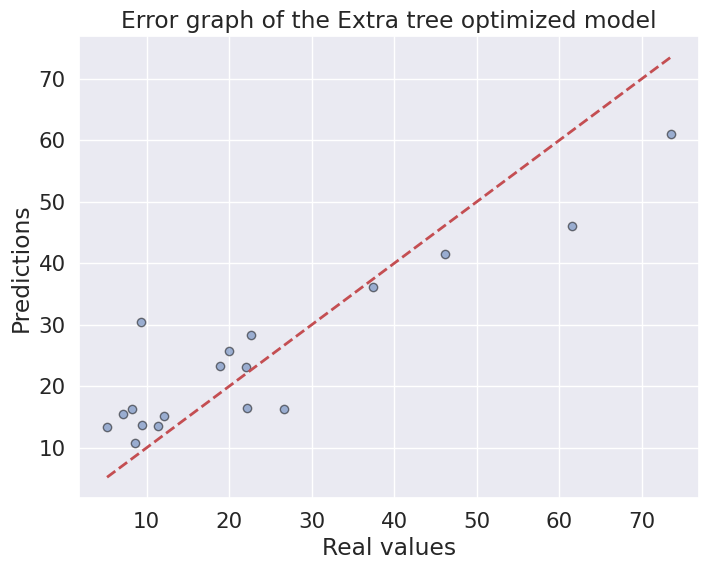

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tuning the model with best hyperparameter set
model_tune_et = ExtraTreesRegressor( max_depth = 11, max_features = 0.36343435219303777, min_samples_leaf = 1, min_samples_split = 6, n_estimators = 603 , random_state=42)
#Train the model
model_tune_et.fit(X_train, y_train)
#Test the model
y_train_pred_tune_et = model_tune_et.predict(X_train)
y_test_pred_tune_et = model_tune_et.predict(X_test)
#Evaluate the train model
mse_train_tune_et = mean_squared_error(y_train, y_train_pred_tune_et)
rmse_train_tune_et = np.sqrt(mse_train_tune_et)
mae_train_tune_et = mean_absolute_error(y_train, y_train_pred_tune_et)
mape_train_tune_et = mean_absolute_percentage_error(y_train, y_train_pred_tune_et)
r2_train_tune_et = r2_score(y_train, y_train_pred_tune_et)
#Evaluate the test model
mse_test_tune_et = mean_squared_error(y_test, y_test_pred_tune_et)
rmse_test_tune_et = np.sqrt(mse_test_tune_et)
mae_test_tune_et = mean_absolute_error(y_test, y_test_pred_tune_et)
mape_test_tune_et = mean_absolute_percentage_error(y_test, y_test_pred_tune_et)
r2_test_tune_et = r2_score(y_test, y_test_pred_tune_et)
# Statistical metric for train model
print("Train Metrics:")
print(f'MSE: {mse_train_tune_et}')
print(f'RMSE: {rmse_train_tune_et}')
print(f'MAE: {mae_train_tune_et}')
print(f'MAPE: {mape_train_tune_et}')
print(f'R2: {r2_train_tune_et}')
# Statistical metric for test model
print("\nTest Metrics:")
print(f'MSE: {mse_test_tune_et}')
print(f'RMSE: {rmse_test_tune_et}')
print(f'MAE: {mae_test_tune_et}')
print(f'MAPE: {mape_test_tune_et}')
print(f'R2: {r2_test_tune_et}')
#Error graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_tune_et, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Error graph of the Extra tree optimized model')
plt.grid(True)
plt.savefig("error graph et tune model.png", dpi=600, format='png', bbox_inches='tight')
plt.show()
files.download("error graph et tune model.png")

Train metrics:
MSE: 116.13984264646732
RMSE: 10.776819690728212
MAE: 7.493438383824996
MAPE: 0.4748216567762966
R2: 0.7236107658647457

Test metrics:
MSE: 112.23794770150576
RMSE: 10.594241251807784
MAE: 9.515751308086212
MAPE: 0.7980760624287975
R2: 0.6860536944789227


<ipython-input-19-58574fdad87c>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')


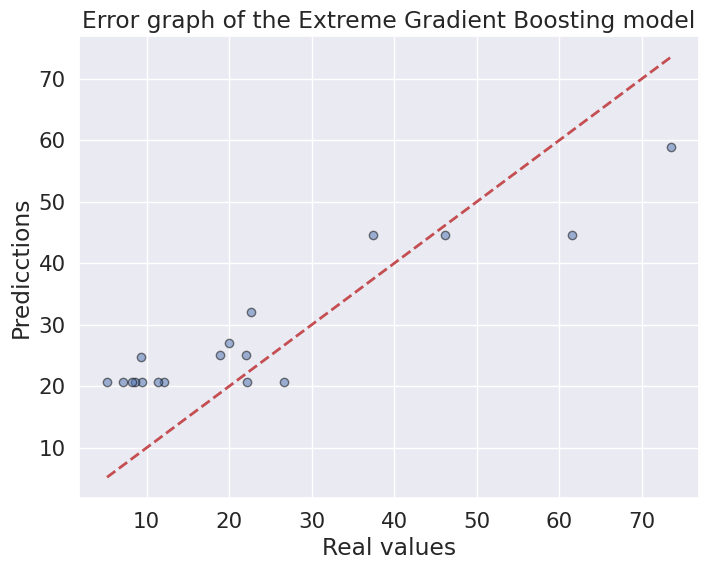

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Implement the Extreme Gradient Boosting Regressor
model_xgb = XGBRegressor(n_estimators=3, random_state=42)
#Train the model
model_xgb.fit(X_train, y_train)
#Test the model
y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)
#Evaluate the train model
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
#Evaluate the test model
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
#Statistical metrics for the train model
print("Train metrics:")
print(f'MSE: {mse_train_xgb}')
print(f'RMSE: {rmse_train_xgb}')
print(f'MAE: {mae_train_xgb}')
print(f'MAPE: {mape_train_xgb}')
print(f'R2: {r2_train_xgb}')
#Statistical metrics for the test model
print("\nTest metrics:")
print(f'MSE: {mse_test_xgb}')
print(f'RMSE: {rmse_test_xgb}')
print(f'MAE: {mae_test_xgb}')
print(f'MAPE: {mape_test_xgb}')
print(f'R2: {r2_test_xgb}')
plt.figure(figsize=(8, 6))
#Error graph
plt.scatter(y_test, y_test_pred_xgb, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')
plt.xlabel('Real values')
plt.ylabel('Predicctions')
plt.title('Error graph of the Extreme Gradient Boosting model')
plt.grid(True)
plt.savefig("error graph xgbr model.png", dpi=600, format='png', bbox_inches='tight')
plt.show()
files.download("error graph xgbr model.png")

In [ ]:
# Define the range of the hyperparameter set for Bayesian
param_dist_xgb = {
    'n_estimators': Integer(1, 1000),
    'max_depth': Integer(3, 20)
    }

# Implement bayesian optimization
bayesian_xgb= BayesSearchCV(estimator = model_xgb, search_spaces = param_dist_xgb,
                                    n_iter=100, cv=5, n_jobs=-1,
                                    random_state=42)

# Train model
bayesian_xgb.fit(X_train, y_train)

# Best hyperparameter set
print("Best hyperparameter set:", bayesian_xgb.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3, 1] before, using random point [10, 78]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3, 1] before, using random point [10, 768]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3, 1] before, using random point [4, 427]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 1] before, using random point [15, 334]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserW

Best hyperparameter set: OrderedDict([('max_depth', 3), ('n_estimators', 4)])


Train metrics:
MSE: 115.4551454279514
RMSE: 10.74500560390507
MAE: 8.556581459246145
MAPE: 0.5315365654125278
R2: 0.7252402061629922

Test Metrics:
MSE: 103.51209135595775
RMSE: 10.174089215057913
MAE: 9.25589826294054
MAPE: 0.754828605436042
R2: 0.7104612181221557


<ipython-input-20-1e73b2debda3>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')


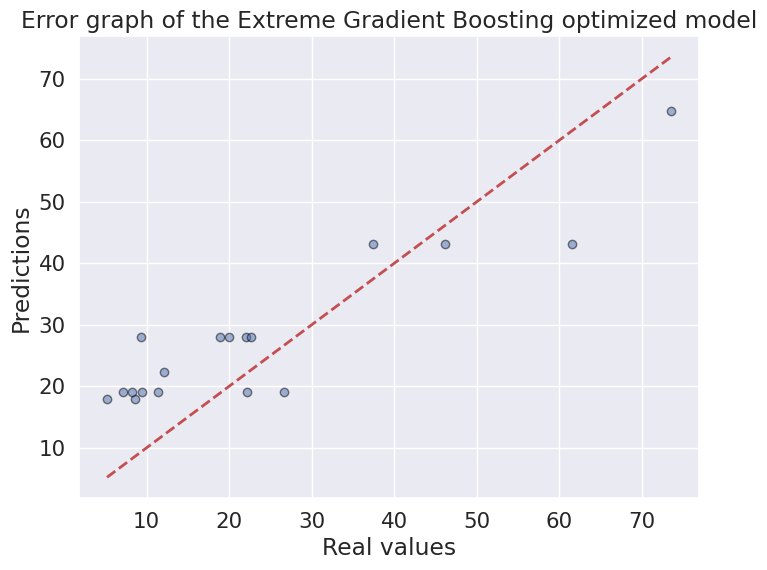

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tuning the model with best hyperparameter set
model_tune_xgb = XGBRegressor( max_depth= 3, n_estimators= 4, random_state=42)
#Train the model
model_tune_xgb.fit(X_train, y_train)
#Tune the model
y_train_pred_tune_xgb = model_tune_xgb.predict(X_train)
y_test_pred_tune_xgb = model_tune_xgb.predict(X_test)
#Evaluate the train model
mse_train_tune_xgb = mean_squared_error(y_train, y_train_pred_tune_xgb)
rmse_train_tune_xgb = np.sqrt(mse_train_tune_xgb)
mae_train_tune_xgb = mean_absolute_error(y_train, y_train_pred_tune_xgb)
mape_train_tune_xgb = mean_absolute_percentage_error(y_train, y_train_pred_tune_xgb)
r2_train_tune_xgb = r2_score(y_train, y_train_pred_tune_xgb)
#Evaluate the train model
mse_test_tune_xgb = mean_squared_error(y_test, y_test_pred_tune_xgb)
rmse_test_tune_xgb = np.sqrt(mse_test_tune_xgb)
mae_test_tune_xgb = mean_absolute_error(y_test, y_test_pred_tune_xgb)
mape_test_tune_xgb = mean_absolute_percentage_error(y_test, y_test_pred_tune_xgb)
r2_test_tune_xgb = r2_score(y_test, y_test_pred_tune_xgb)
#Statistical metrics for train model
print("Train metrics:")
print(f'MSE: {mse_train_tune_xgb}')
print(f'RMSE: {rmse_train_tune_xgb}')
print(f'MAE: {mae_train_tune_xgb}')
print(f'MAPE: {mape_train_tune_xgb}')
print(f'R2: {r2_train_tune_xgb}')
#Statistical metrics for train model
print("\nTest Metrics:")
print(f'MSE: {mse_test_tune_xgb}')
print(f'RMSE: {rmse_test_tune_xgb}')
print(f'MAE: {mae_test_tune_xgb}')
print(f'MAPE: {mape_test_tune_xgb}')
print(f'R2: {r2_test_tune_xgb}')
#Error graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_tune_xgb, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Error graph of the Extreme Gradient Boosting optimized model')
plt.grid(True)
plt.savefig("error graph xgbr tune model.png", dpi=600, format='png', bbox_inches='tight')
plt.show()
files.download("error graph xgbr tune model.png")

Train Metrics:
MSE: 132.01761679785972
RMSE: 11.489891940216832
MAE: 9.028159779749839
MAPE: 0.5132165308532276
R2: 0.6858248886198934

Test Metrics:
MSE: 141.82689567219498
RMSE: 11.909109776645565
MAE: 9.692367248716456
MAPE: 0.6027375266520745
R2: 0.6032889870881742


<ipython-input-21-2bc78c5288be>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')


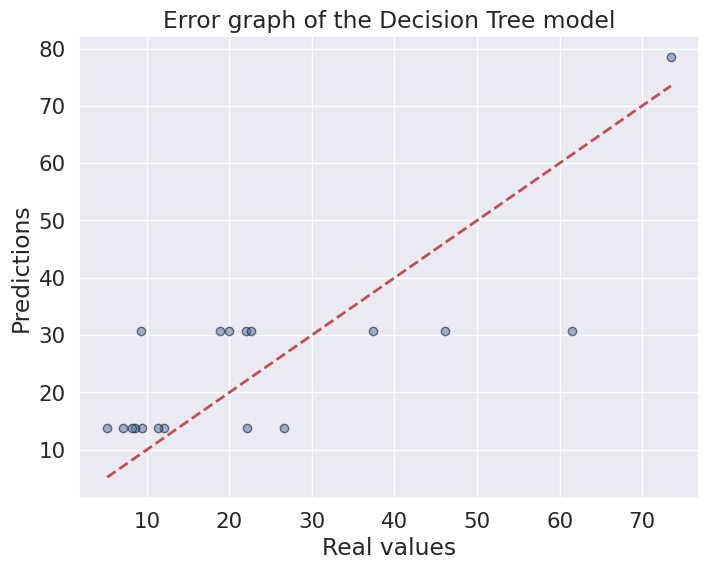

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Implement the Decision Tree Regressor model
model_dt = DecisionTreeRegressor(max_depth=2, random_state=42)
# Train the model
model_dt.fit(X_train, y_train)
# Test the model
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)
# Evaluate the train model
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)
mape_train_dt = mean_absolute_percentage_error(y_train, y_train_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)
# Evaluate the test model
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
mape_test_dt = mean_absolute_percentage_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)
#Statistical metrics for the train model
print("Train Metrics:")
print(f'MSE: {mse_train_dt}')
print(f'RMSE: {rmse_train_dt}')
print(f'MAE: {mae_train_dt}')
print(f'MAPE: {mape_train_dt}')
print(f'R2: {r2_train_dt}')
#Statistical metrics for the test model
print("\nTest Metrics:")
print(f'MSE: {mse_test_dt}')
print(f'RMSE: {rmse_test_dt}')
print(f'MAE: {mae_test_dt}')
print(f'MAPE: {mape_test_dt}')
print(f'R2: {r2_test_dt}')
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_dt, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Error graph of the Decision Tree model')
plt.grid(True)
plt.savefig("error graph dt model.png", dpi=600, format='png', bbox_inches='tight')
plt.show()
files.download("error graph dt model.png")

In [ ]:
# Define the range of the hyperparameter set for Bayesian
param_dist_dt = {
    'max_depth': (1,50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': ('sqrt', 'log2'),
    'max_leaf_nodes': (2, 100),
    }

# Implement bayesian optimization
bayesian_dt= BayesSearchCV(estimator = model_dt, search_spaces = param_dist_dt,
                                    n_iter=100, cv=5, n_jobs=-1,
                                    random_state=42)

# Train model
bayesian_dt.fit(X_train, y_train)

# Best hyperparameter set
print("Best hyperparameter set:", bayesian_dt.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameter set: OrderedDict([('max_depth', 13), ('max_features', 'sqrt'), ('max_leaf_nodes', 9), ('min_samples_leaf', 1), ('min_samples_split', 7)])


Train metrics:
MSE: 60.706596003269
RMSE: 7.79144376885754
MAE: 5.750716962027555
MAPE: 0.25395636242513336
R2: 0.8555306327788265

Test metrics:
MSE: 111.74181175240099
RMSE: 10.570799958016469
MAE: 6.919691532976819
MAPE: 0.5150292804184978
R2: 0.6874414608400101


<ipython-input-22-515bbcfe816d>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')


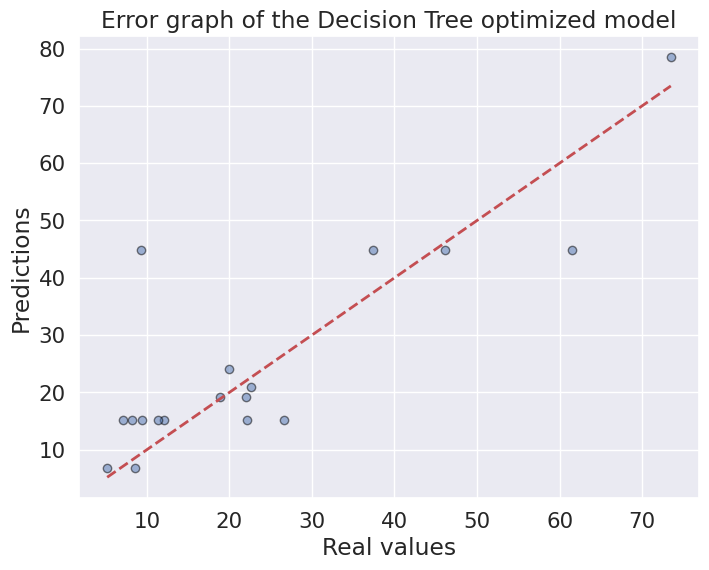

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tuning the model with best hyperparameter set
model_tune_dt = DecisionTreeRegressor( max_depth= 13, min_samples_split= 7, min_samples_leaf = 1, max_leaf_nodes = 9,max_features = 'sqrt', random_state=42)
#Train the model
model_tune_dt.fit(X_train, y_train)
#Tune the model
y_train_pred_tune_dt = model_tune_dt.predict(X_train)
y_test_pred_tune_dt = model_tune_dt.predict(X_test)
#Evaluate the train model
mse_train_tune_dt = mean_squared_error(y_train, y_train_pred_tune_dt)
rmse_train_tune_dt = np.sqrt(mse_train_tune_dt)
mae_train_tune_dt = mean_absolute_error(y_train, y_train_pred_tune_dt)
mape_train_tune_dt = mean_absolute_percentage_error(y_train, y_train_pred_tune_dt)
r2_train_tune_dt = r2_score(y_train, y_train_pred_tune_dt)
#Evaluate the train model
mse_test_tune_dt = mean_squared_error(y_test, y_test_pred_tune_dt)
rmse_test_tune_dt = np.sqrt(mse_test_tune_dt)
mae_test_tune_dt = mean_absolute_error(y_test, y_test_pred_tune_dt)
mape_test_tune_dt = mean_absolute_percentage_error(y_test, y_test_pred_tune_dt)
r2_test_tune_dt = r2_score(y_test, y_test_pred_tune_dt)
#Statistical metrics for train model
print("Train metrics:")
print(f'MSE: {mse_train_tune_dt}')
print(f'RMSE: {rmse_train_tune_dt}')
print(f'MAE: {mae_train_tune_dt}')
print(f'MAPE: {mape_train_tune_dt}')
print(f'R2: {r2_train_tune_dt}')
#Statistical metrics for train model
print("\nTest metrics:")
print(f'MSE: {mse_test_tune_dt}')
print(f'RMSE: {rmse_test_tune_dt}')
print(f'MAE: {mae_test_tune_dt}')
print(f'MAPE: {mape_test_tune_dt}')
print(f'R2: {r2_test_tune_dt}')
#Error graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_tune_dt, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Error graph of the Decision Tree optimized model')
plt.grid(True)
plt.savefig("error graph dt tune model.png", dpi=600, format='png', bbox_inches='tight')
plt.show()
files.download("error graph dt tune model.png")